# ¿Podemos aproximar la cantidad de baños según la precio y el tamaño en metros cuadrados del inmueble?

Analizamos calidad de los datos

In [1]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

/home/gianluca/Documents/Metodos Numericos/github_grupal/metodos-num/tp3/notebooks
Python 3.8.5


In [10]:
#crea una matriz la cual tiene cada feature en sus columnas


def crearPhi(features, data , label):
    vals = []
    for f in features: 
        x = data[f].dropna().values
        x /= np.linalg.norm(x)
        vals.append(x)
    
    
    y = data[label].dropna().values 
    
    sinNan = min(len(y) , min([len(s) for s in vals ]))
    y = y[:sinNan]
    y = y.reshape(len(y),1) 
    
    X = np.zeros((sinNan,len(features)))
    
    for i in range (len(features) ):
        X[:,i] = vals[i][:sinNan]
    
      
    return X, y
    

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, precision_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


def cross_val(X, y, linear_regressor, k, func = "Poly",grado = 3):
    
    RMSE = []
    MAE = []
    
    kf = KFold(n_splits=k)
    i = 1
    
    if (func == "Poly"):
        poly = PolynomialFeatures(grado)
        X = poly.fit_transform(X)
    
    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        linear_regressor.fit(X,y_train)
        #       linear_regressor = metnum.LinearRegression()

        y_pred = linear_regressor.predict(X)


        rmse= np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        
        RMSE.append(rmse)
        MAE.append(mae)
        i += 1
    

    return RMSE,MAE

In [3]:
#cuantos elementos faltan para cada caracteristica?

df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [5]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
#precio no tiene inmuebles Null

No handles with labels found to put in legend.


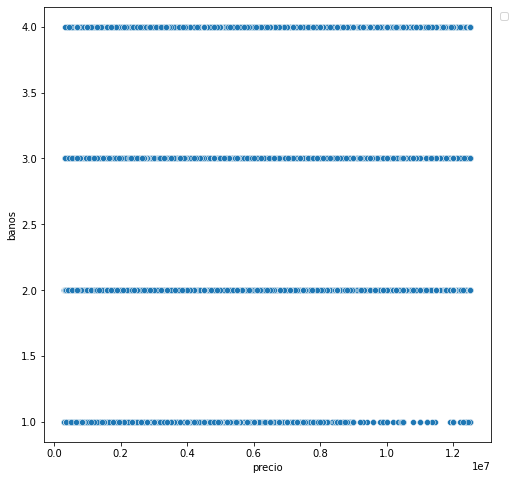

No handles with labels found to put in legend.


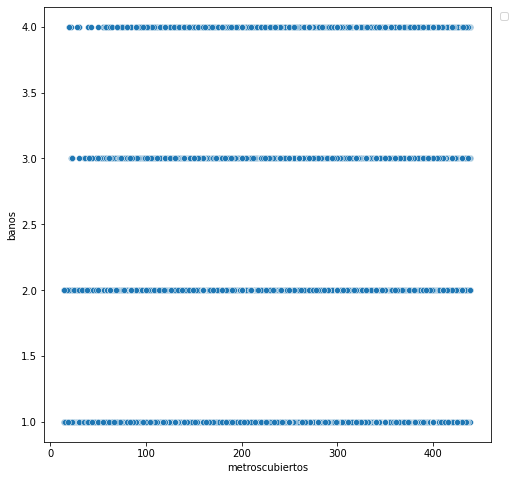

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "banos" )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "metroscubiertos", y = "banos" )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

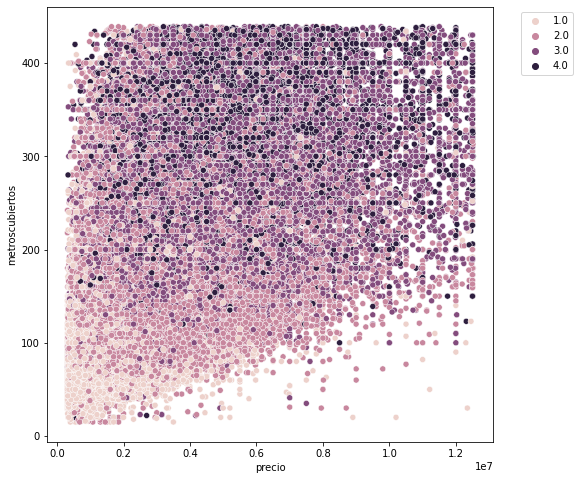

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [16]:
X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()
X.shape

(207175, 2)

In [20]:
gradoPoly = 3
poly = PolynomialFeatures(gradoPoly)
X = poly.fit_transform(X)
X.shape

(207175, 1771)

In [21]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

gradoPoly = 3
poly = PolynomialFeatures(gradoPoly)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)


rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.6178295044659278

Mean Absolute Error :0.47610975302578906



 Accuracy : 0.6144949921563895


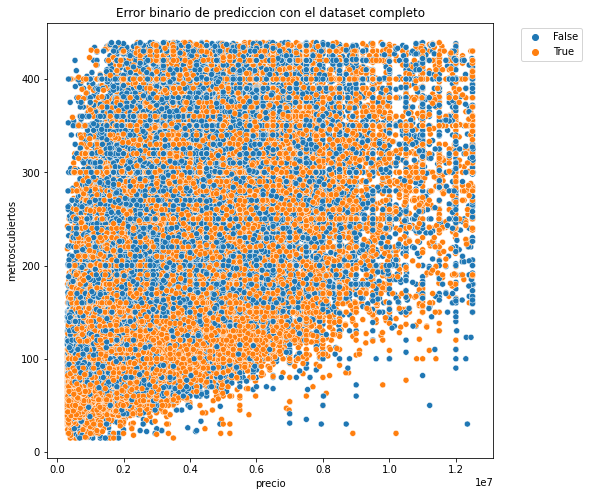

In [27]:
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )

boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)

plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =boolpred )
plt.title("Error binario de prediccion con el dataset completo")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


In [39]:
X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 4
cvR,cvM = cross_val(X, y_true, linear_regressor, k)



In [42]:
sum(cvR)/4,cvR

(0.8442704108563714,
 [1.0471880208814386,
  0.937224560278586,
  0.7524228117032168,
  0.6402462505622443])

# Utilizamos precio y metroscubiertos para predecir #banos segmentando por Provincia de Yucatan

In [3]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]


In [4]:
df = df[df['provincia'] == 'Yucatán']

In [21]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.6348258235434426

Mean Absolute Error :0.5088306948917826



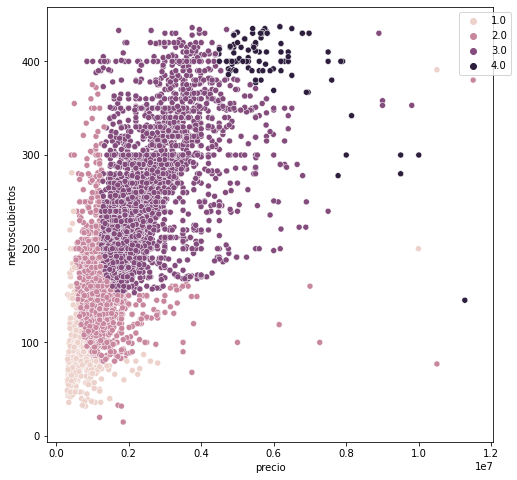

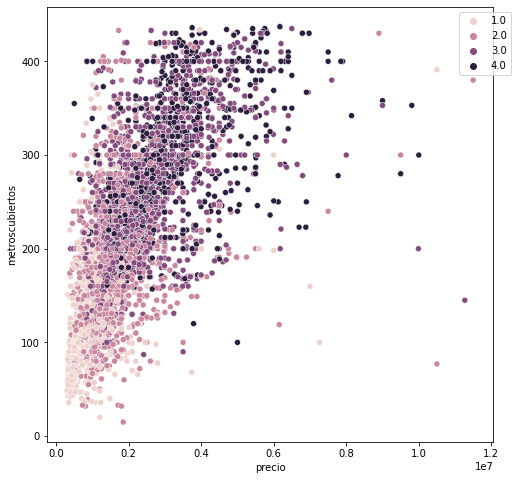

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =np.around(y_pred).reshape(-1) )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

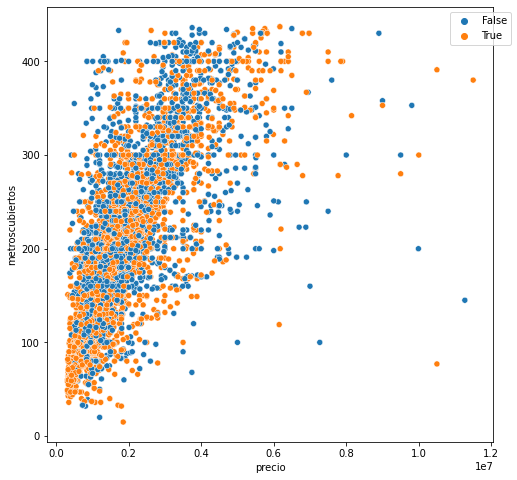

In [18]:
boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)

plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =boolpred )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

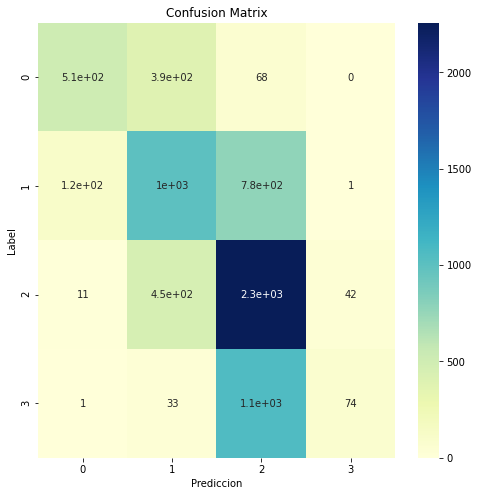

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true.reshape(-1),np.around(y_pred).reshape(-1))
plt.figure(figsize=(8,8))
sns.heatmap(cm,cmap = "YlGnBu",annot = True)
plt.title("Confusion Matrix")

plt.xlabel("Prediccion")
plt.ylabel("Label")
plt.show()

# Segmentamos todavia mas chau cuatro banios con menos estas bien

In [23]:
df = df[df['banos'] < 4.]

In [24]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.5203122886169889

Mean Absolute Error :0.4179789330730125



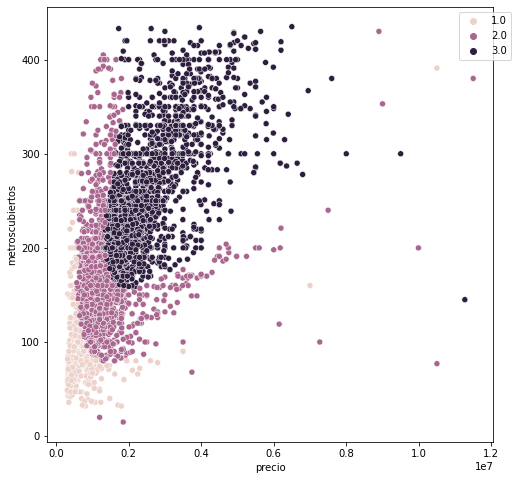

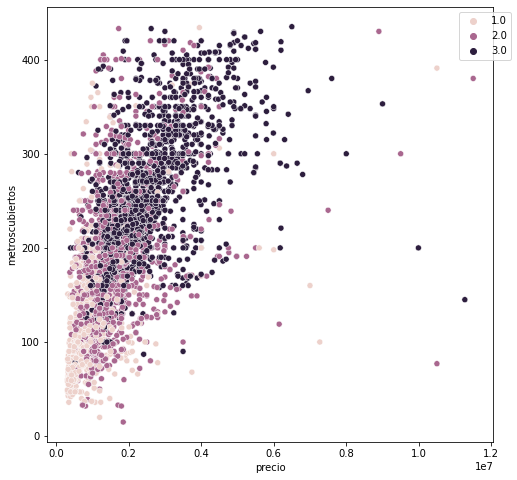

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =np.around(y_pred).reshape(-1) )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

 Accuracy : 0.6695683069817019


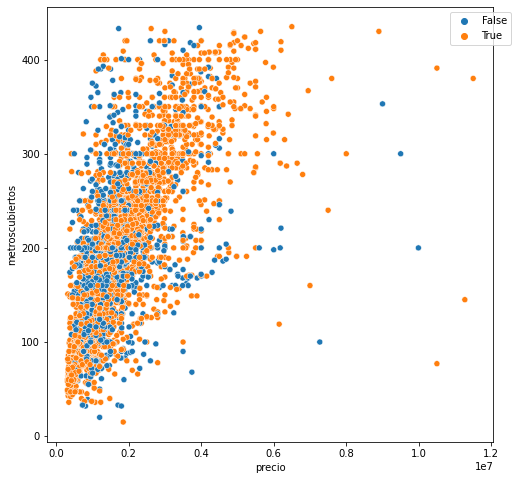

In [34]:
from sklearn.metrics import accuracy_score

boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =boolpred )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Segmentamos todavia mas chau tres banios con menos estas bien

In [36]:
df = df[df['banos'] < 3.]

In [37]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.3697142531091898

Mean Absolute Error :0.2774592457045498



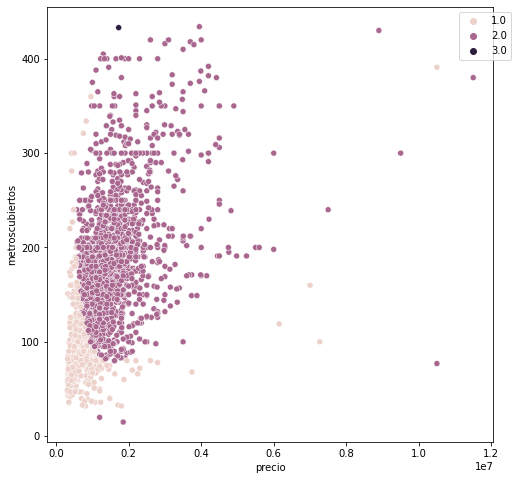

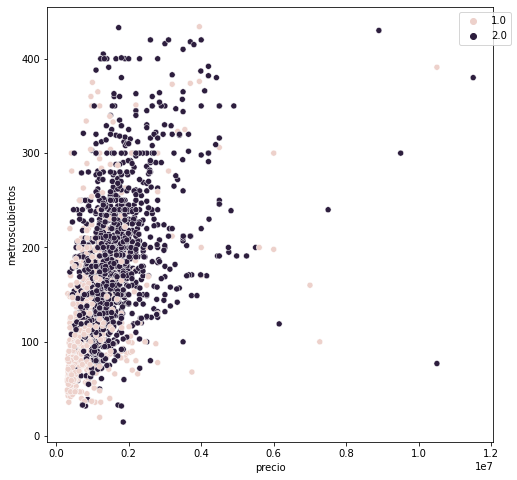

In [38]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =np.around(y_pred).reshape(-1) )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

 Accuracy : 0.8013245033112583


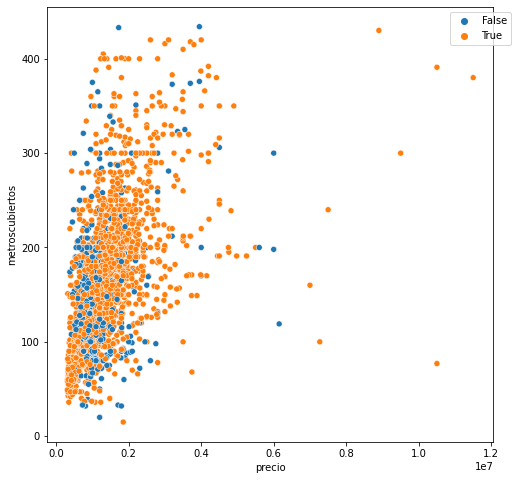

In [40]:
from sklearn.metrics import accuracy_score

boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =boolpred )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Segmentamos por ciudades de Yucatan

In [42]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]

df = df[df['provincia'] == 'Yucatán']

In [46]:
len(df["ciudad"].unique())

35

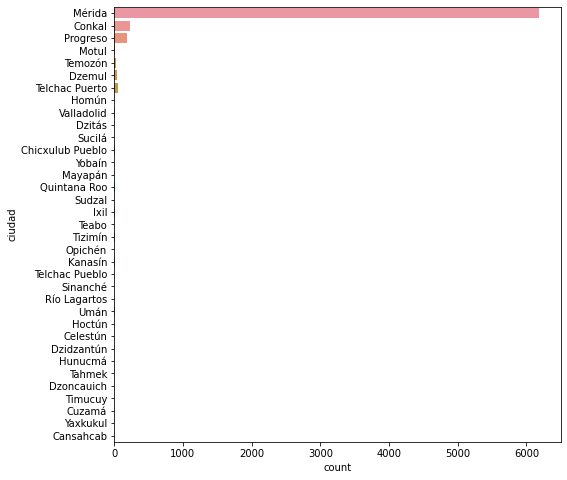

In [49]:
plt.figure(figsize=(8,8))
chart = sns.countplot(data = df, y = "ciudad")
#chart.set_xticklabels(chart.get_yticklabels(), rotation=90, horizontalalignment='right')

plt.show()

# Elegimos merida por ser la que mas inmuebles tiene en el dataset

In [50]:
df = df[df['ciudad'] == 'Mérida']

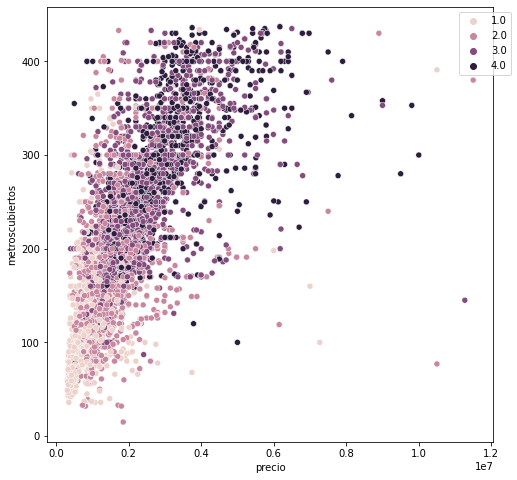

In [51]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

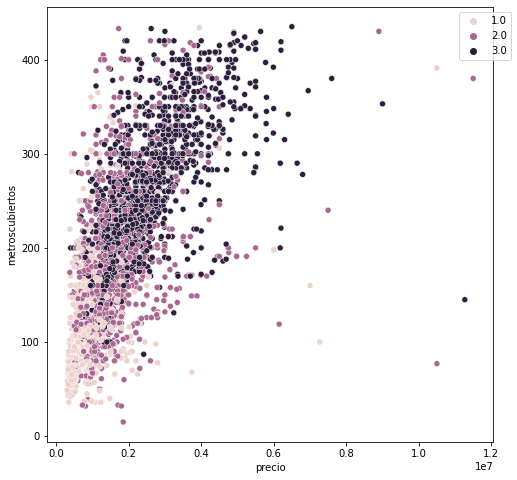

In [53]:
df = df[df['banos'] < 4]

plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [54]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.5138074531171324

Mean Absolute Error :0.41039784592406453



# No le habia sumado metrostotales vamos con esa REYY(Yucatan)

In [56]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metrostotales"].notnull()
df = df[filtNull]
filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
df = df[df['banos'] < 4.]

# No parece haber ningun cambio

In [57]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio','metrostotales'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.5210474221730538

Mean Absolute Error :0.4183337687971789



# Servira segmentar por inmueble?

In [63]:

df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]

df = df[df['provincia'] == 'Yucatán']


#df = df[df["tipodepropiedad"] == "Apartamento"]

Text(0.5, 0, 'tipodepropiedad')

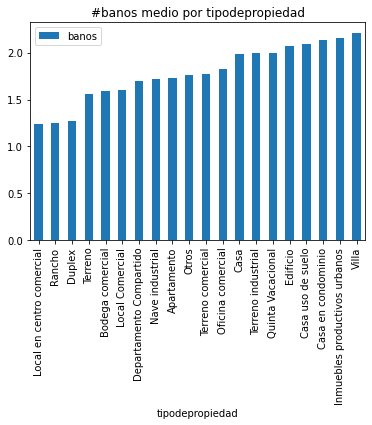

In [58]:

df_provinces = df.groupby(['tipodepropiedad']).mean().sort_values(by = 'banos')
ax = df_provinces.plot.bar(y = 'banos')
ax.set_title('#banos medio por tipodepropiedad')
ax.set_xlabel('tipodepropiedad')

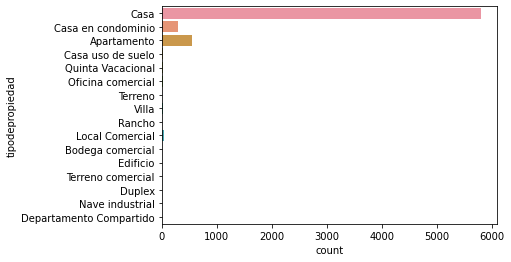

<AxesSubplot:xlabel='count', ylabel='tipodepropiedad'>

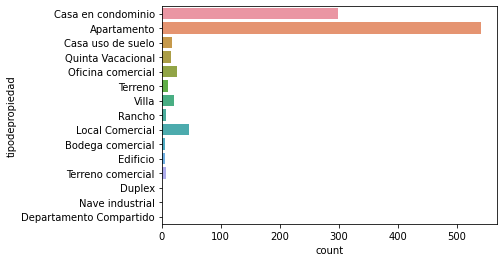

In [84]:
sns.countplot(data = df , y = "tipodepropiedad")
plt.show()
sns.countplot(data = df[df["tipodepropiedad"] != "Casa"] , y = "tipodepropiedad")

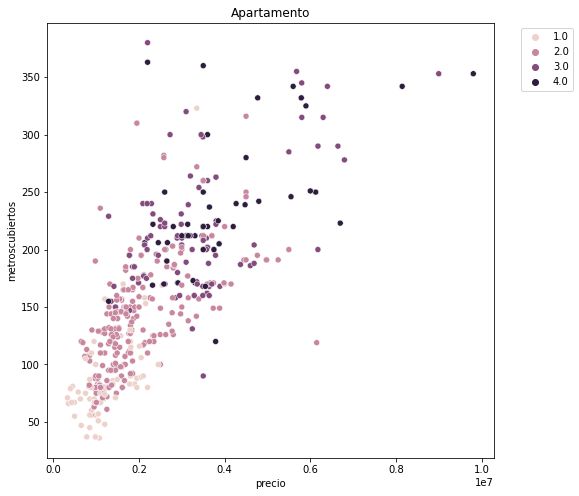

In [65]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df[df["tipodepropiedad"] == "Apartamento"], x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))

plt.title("Apartamento")
plt.show()

In [64]:
df["banos"].unique()

array([4., 1., 3., 2.])

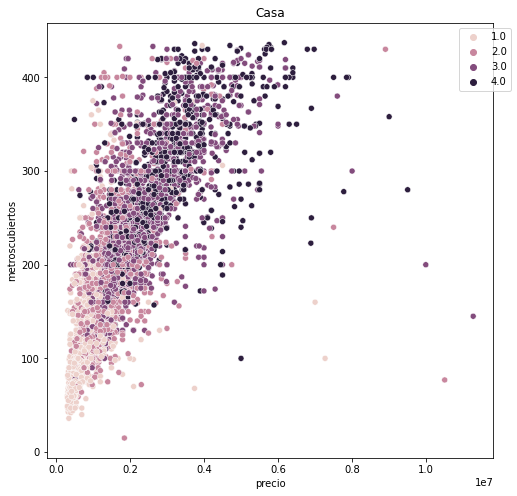

In [69]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df[df["tipodepropiedad"] == "Casa"], x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))

plt.title("Casa")
plt.show()

<AxesSubplot:xlabel='banos', ylabel='tipodepropiedad'>

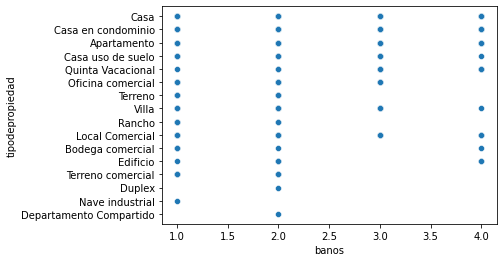

In [86]:
sns.scatterplot(data = df, y = "tipodepropiedad", x = "banos")

# Nos concentramos en Yucatan con 3 banos que fue lo que mejor funciono pero agregamos algunos features que dieron bien correlacionados para ver si mejora

In [92]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
df = df[df['banos'] < 4.]
df = df[df['provincia'] == 'Yucatán']

In [94]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio','metrostotales','habitaciones','garages'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )


Polynomial Function
Root Mean Square Error :0.4877367680016403

Mean Absolute Error :0.384992385055786

 Accuracy : 0.7060240963855422
